# GAN Generator Example

In [27]:
import torch
from torch import nn
import torch.nn.functional as F

In [18]:
# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

In [34]:
nz = 100
latent_vector = torch.randn(1, nz, 1, 1)
latent_vector.shape

torch.Size([1, 100, 1, 1])

In [35]:
conv1 = nn.ConvTranspose2d(in_channels=nz, out_channels=(ngf * 8), kernel_size=4, stride=1, padding=0, bias=False)
tensor = conv1(latent_vector)
tensor.shape

torch.Size([1, 512, 4, 4])

In [36]:
batch_norm1 = nn.BatchNorm2d(num_features=(ngf * 8))
tensor = batch_norm1(tensor)
tensor.shape

torch.Size([1, 512, 4, 4])

In [37]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 512, 4, 4])

In [39]:
conv2 = nn.ConvTranspose2d(in_channels=(ngf * 8), out_channels=(ngf * 4), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv2(tensor)
tensor.shape

torch.Size([1, 256, 8, 8])

In [40]:
batch_norm2 = nn.BatchNorm2d(num_features=(ngf * 4))
tensor = batch_norm2(tensor)
tensor.shape

torch.Size([1, 256, 8, 8])

In [41]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 256, 8, 8])

In [42]:
conv3 = nn.ConvTranspose2d(in_channels=(ngf * 4), out_channels=(ngf * 2), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv3(tensor)
tensor.shape

torch.Size([1, 128, 16, 16])

In [43]:
batch_norm3 = nn.BatchNorm2d(num_features=(ngf * 2))
tensor = batch_norm3(tensor)
tensor.shape

torch.Size([1, 128, 16, 16])

In [44]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 128, 16, 16])

In [45]:
conv4 = nn.ConvTranspose2d(in_channels=(ngf * 2), out_channels=(ngf * 1), kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv4(tensor)
tensor.shape

torch.Size([1, 64, 32, 32])

In [46]:
batch_norm4 = nn.BatchNorm2d(num_features=(ngf * 1))
tensor = batch_norm4(tensor)
tensor.shape

torch.Size([1, 64, 32, 32])

In [47]:
tensor = F.relu(tensor)
tensor.shape

torch.Size([1, 64, 32, 32])

In [48]:
conv5 = nn.ConvTranspose2d(in_channels=(ngf * 1), out_channels=nc, kernel_size=4, stride=2, padding=1, bias=False)
tensor = conv5(tensor)
tensor.shape

torch.Size([1, 3, 64, 64])

In [49]:
tensor = torch.tanh(tensor)
tensor.shape

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.Size([1, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


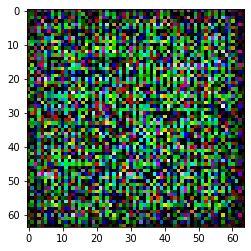

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

image = tensor.squeeze(0).detach()

plt.imshow(image.permute(1, 2, 0).numpy())